ALL FEATURES
RIVER ALAGNAK
SPLIT USING split_time_series_by_river


Gradient Boosting Evaluation Metrics (Alagnak only):
R²   (R-squared):              -0.2892
MSE  (Mean Squared Error):     4492895261717.67
MAPE (Mean Absolute % Error):  57.39%

Polynomial Regression Evaluation Metrics (Alagnak only):
R²   (R-squared):              -966.7214
MSE  (Mean Squared Error):     3372608856177959.00
MAPE (Mean Absolute % Error):  885.30%

Linear Regression Evaluation Metrics (Alagnak only):
R²   (R-squared):              -1.1044
MSE  (Mean Squared Error):     7333952290072.80
MAPE (Mean Absolute % Error):  52.25%

Random Forest Evaluation Metrics (Alagnak only):
R²   (R-squared):              -0.0160
MSE  (Mean Squared Error):     3540965175389.54
MAPE (Mean Absolute % Error):  41.50%

Random Forest with Log-Transformed Target (Alagnak only):
R²   (R-squared):              -0.1764
MSE  (Mean Squared Error):     4099991995453.86
MAPE (Mean Absolute % Error):  38.16%

Random Forest with Log-Transformed Target + GridSearchCV (Alagnak only):
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R²   (R-squared):              -0.1764
MSE  (Mean Squared Error):     4099991995453.86
MAPE (Mean Absolute % Error):  38.16%

XGBoost with Log-Transformed Target + GridSearchCV (Alagnak only):
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
R²   (R-squared):              -0.4024
MSE  (Mean Squared Error):     4887448668556.11
MAPE (Mean Absolute % Error):  41.14%

XGBoost Evaluation Metrics (Alagnak only):
R²   (R-squared):              -0.2029
MSE  (Mean Squared Error):     4192232808210.61
MAPE (Mean Absolute % Error):  40.71%

GradientBoostingRegressor

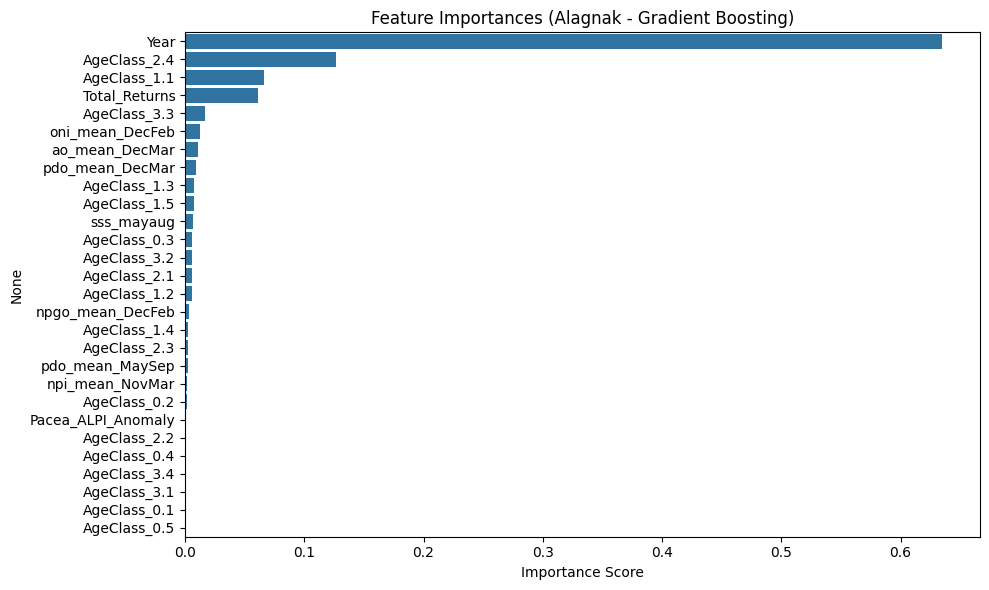

Gradient Boosting Evaluation Metrics (Alagnak only):
R²   (R-squared):              -0.2892
MSE  (Mean Squared Error):     4492895261717.67
MAPE (Mean Absolute % Error):  57.39%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply split function ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# Drop target column and remove 'River' (constant string)
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)

gbr.fit(X_train, y_train)

# === Step 4: Feature Importances ===
feature_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Alagnak - Gradient Boosting)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 5: Predict & Evaluate ===
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Gradient Boosting Evaluation Metrics (Alagnak only):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

Polynomial Regression

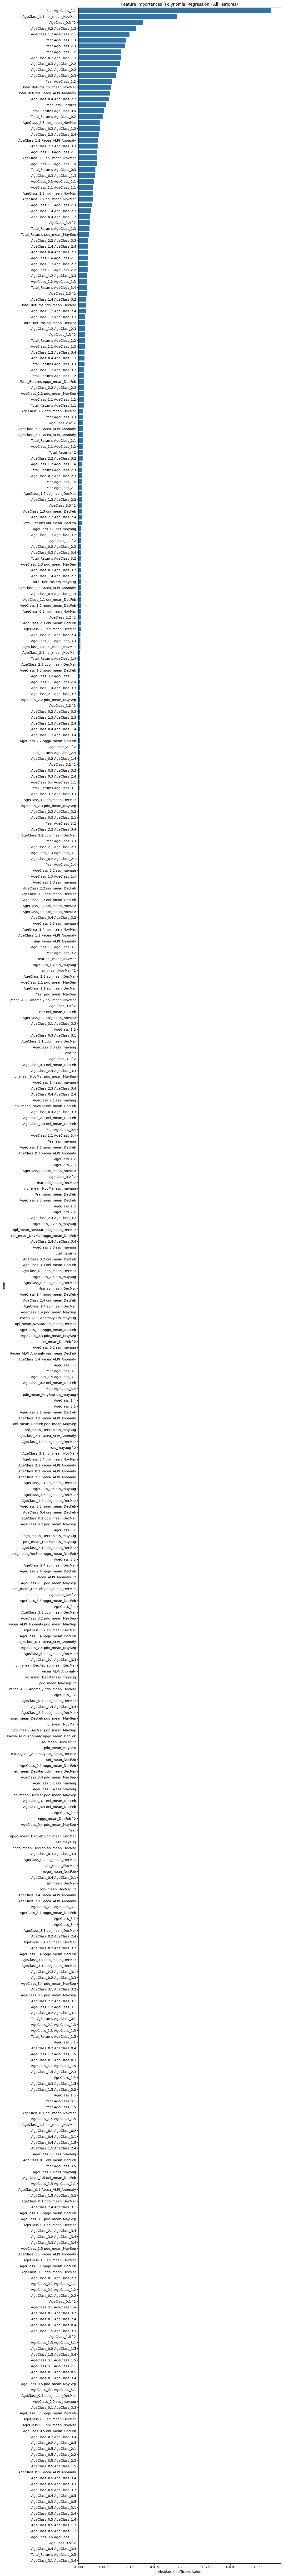

Polynomial Regression Evaluation Metrics (Alagnak only):
R²   (R-squared):              -966.7214
MSE  (Mean Squared Error):     3372608856177959.00
MAPE (Mean Absolute % Error):  885.30%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply the time-series split function ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Polynomial Regression ===
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Get feature names after transformation
feature_names = poly.get_feature_names_out(X_train.columns)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# === Step 5: Plot all feature importances ===
coefficients = pd.Series(model.coef_, index=feature_names)
top_features = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))  # Dynamic height
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Polynomial Regression - All Features)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# === Step 6: Predict & Evaluate ===
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Polynomial Regression Evaluation Metrics (Alagnak only):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Linear Regression

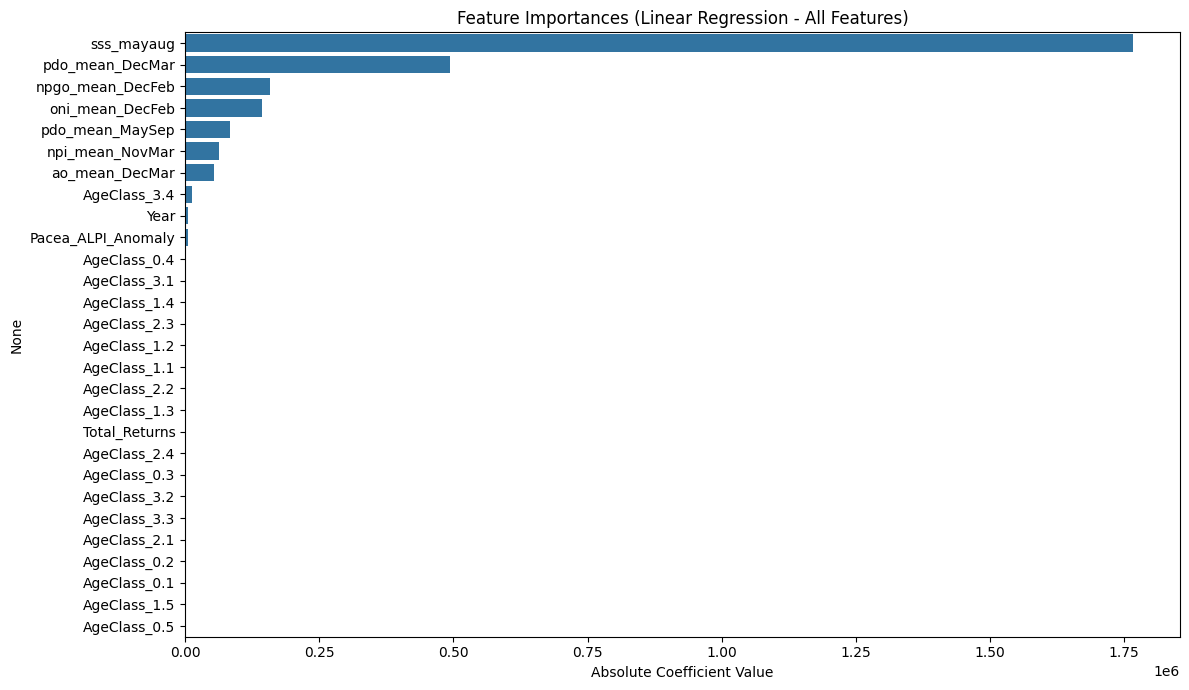

Linear Regression Evaluation Metrics (Alagnak only):
R²   (R-squared):              -1.1044
MSE  (Mean Squared Error):     7333952290072.80
MAPE (Mean Absolute % Error):  52.25%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply the time-series split function ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Linear Regression ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Step 5: Plot all feature importances (raw coefficients) ===
coefficients = pd.Series(model.coef_, index=X_train.columns)
top_features = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))  # Dynamic height
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Linear Regression - All Features)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# === Step 6: Predict & Evaluate ===
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Linear Regression Evaluation Metrics (Alagnak only):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Random Forest model

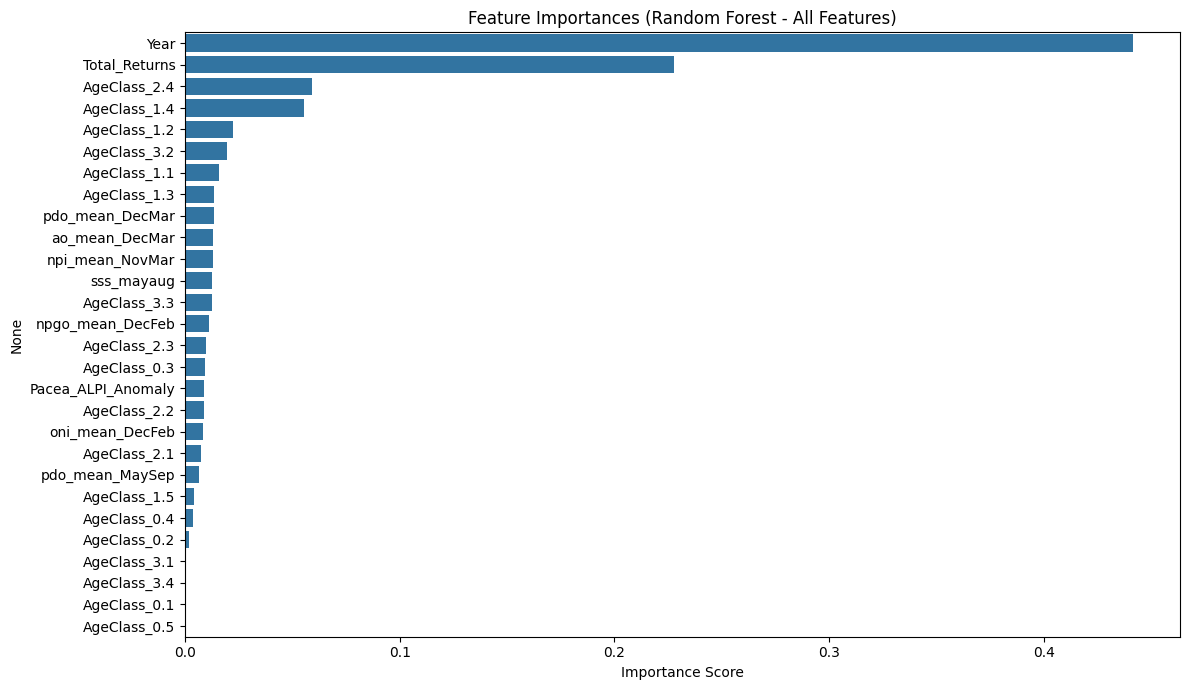

Random Forest Evaluation Metrics (Alagnak only):
R²   (R-squared):              -0.0160
MSE  (Mean Squared Error):     3540965175389.54
MAPE (Mean Absolute % Error):  41.50%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply the time-series split function ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Random Forest Regression ===
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

# === Step 5: Plot all feature importances ===
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))  # Dynamic height
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest - All Features)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict & Evaluate ===
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Random Forest Evaluation Metrics (Alagnak only):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Random Forest Updated Code with Log Transform on Target

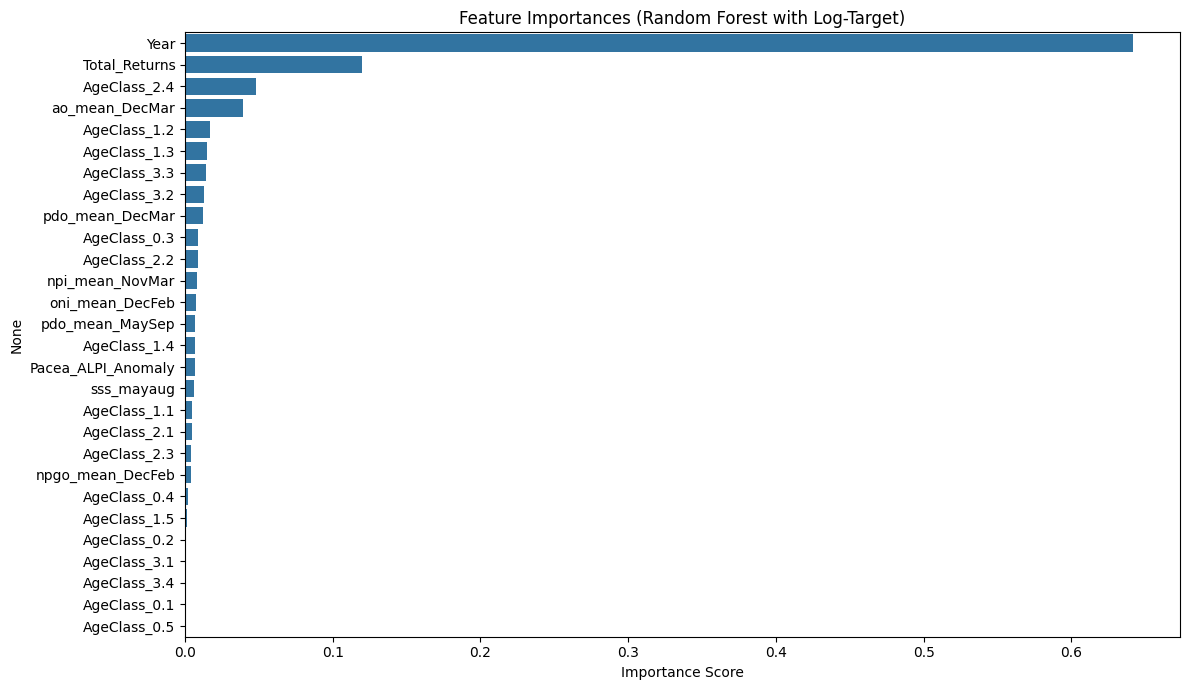

Random Forest with Log-Transformed Target (Alagnak only):
R²   (R-squared):              -0.1764
MSE  (Mean Squared Error):     4099991995453.86
MAPE (Mean Absolute % Error):  38.16%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and log-transformed target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = np.log1p(data_train['Total_Returns_NextYear'])  # log(1 + x)

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']  # keep real values for evaluation

# === Step 4: Train Random Forest ===
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

# === Step 5: Feature Importances ===
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest with Log-Target)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict & Inverse Transform ===
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)  # reverse log1p

# === Step 7: Evaluate ===
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Random Forest with Log-Transformed Target (Alagnak only):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 Random Forest + Log-Transform + GridSearchCV (Alagnak only):

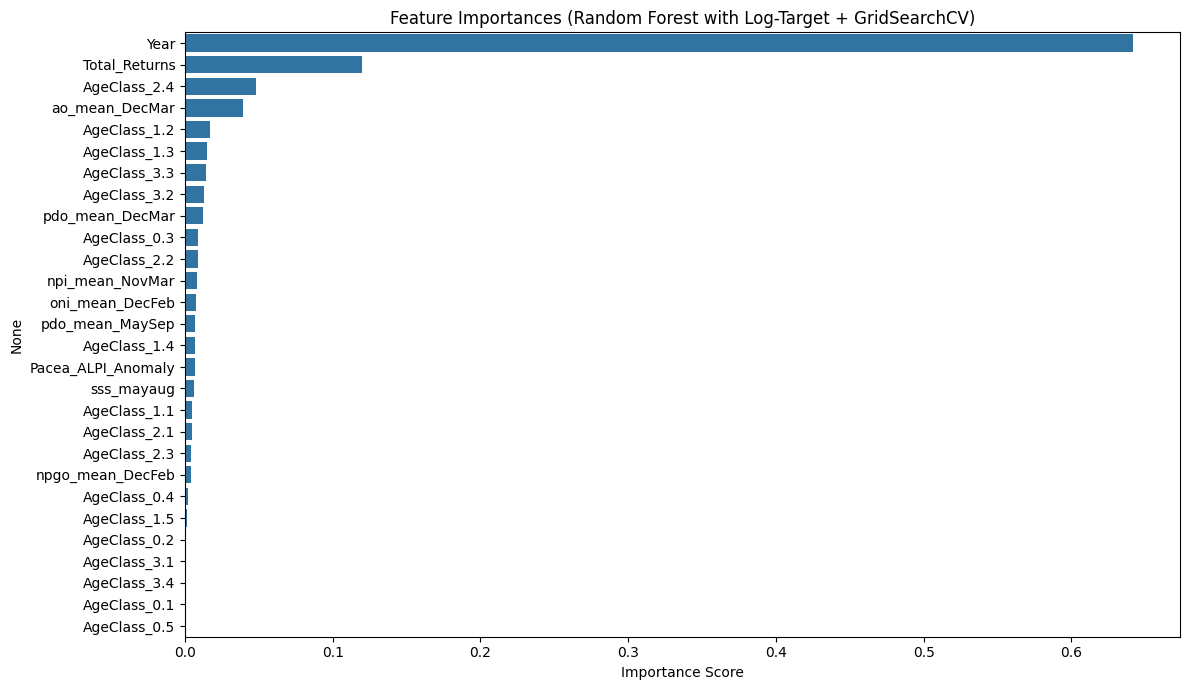

Random Forest with Log-Transformed Target + GridSearchCV (Alagnak only):
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R²   (R-squared):              -0.1764
MSE  (Mean Squared Error):     4099991995453.86
MAPE (Mean Absolute % Error):  38.16%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and log-transformed target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train_log = np.log1p(data_train['Total_Returns_NextYear'])

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Set up hyperparameter grid ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train_log)

# Get the best model
best_rf = grid_search.best_estimator_

# === Step 5: Feature Importances ===
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest with Log-Target + GridSearchCV)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict and inverse transform ===
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)

# === Step 7: Evaluate ===
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Random Forest with Log-Transformed Target + GridSearchCV (Alagnak only):")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


XGBoost Regressor

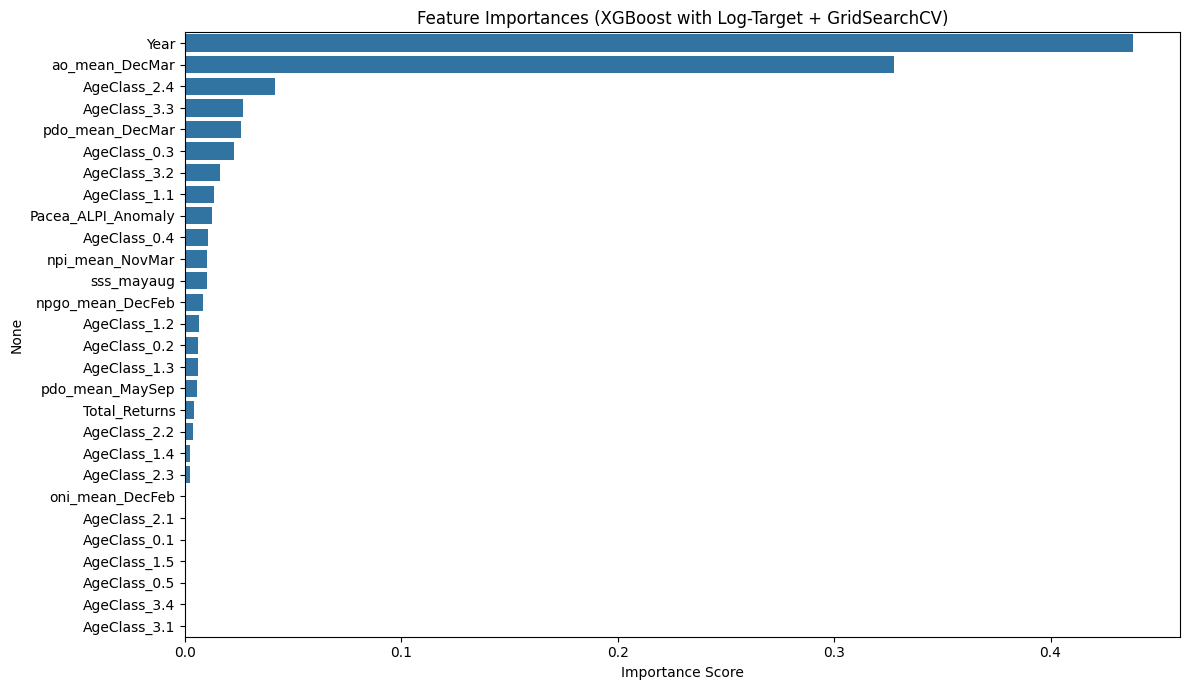

XGBoost with Log-Transformed Target + GridSearchCV (Alagnak only):
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
R²   (R-squared):              -0.4024
MSE  (Mean Squared Error):     4887448668556.11
MAPE (Mean Absolute % Error):  41.14%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and log-transformed target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train_log = np.log1p(data_train['Total_Returns_NextYear'])

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Set up hyperparameter grid ===
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train_log)

# === Step 5: Best Model and Feature Importances ===
best_xgb = grid_search.best_estimator_

feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (XGBoost with Log-Target + GridSearchCV)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 6: Predict and inverse log ===
y_pred_log = best_xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)

# === Step 7: Evaluate ===
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("XGBoost with Log-Transformed Target + GridSearchCV (Alagnak only):")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Simple XGBoost Regressor 

XGBoost Evaluation Metrics (Alagnak only):
R²   (R-squared):              -0.2029
MSE  (Mean Squared Error):     4192232808210.61
MAPE (Mean Absolute % Error):  40.71%


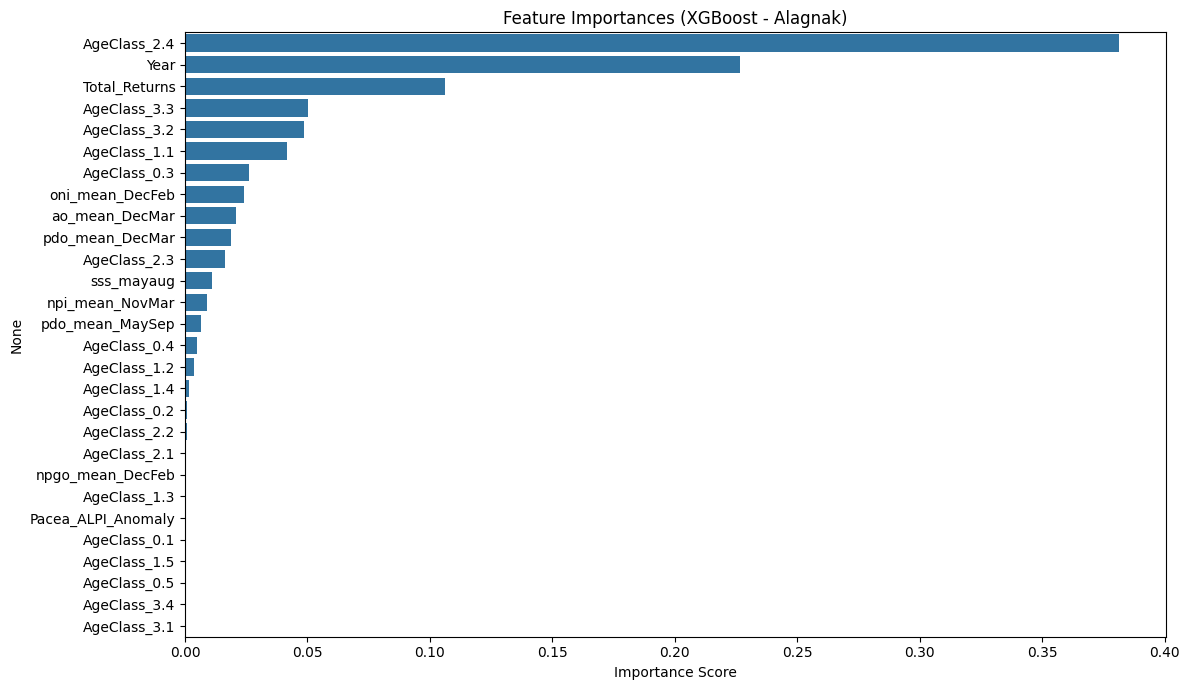

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Define and apply time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 3: Prepare features and target ===
X_train = data_train.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_train = data_train['Total_Returns_NextYear']

X_test = data_test.drop(['Total_Returns_NextYear', 'River'], axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 4: Train XGBoost Regressor ===
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# === Step 5: Predict ===
y_pred = xgb_model.predict(X_test)

# === Step 6: Evaluate ===
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("XGBoost Evaluation Metrics (Alagnak only):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

# === Step 7 (Optional): Feature Importance Plot ===
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (XGBoost - Alagnak)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
